# Zomato Dataset Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\Abhin\OneDrive\Desktop\IMP\eda and feature engineer\zomato.csv',encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df.shape

(9551, 21)

In [4]:
df.describe(include=[np.number]).round()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.0,9551.0,9551.0,9551.0,9551.0,9551.0,9551.0,9551.0
mean,9051128.0,18.0,64.0,26.0,1199.0,2.0,3.0,157.0
std,8791521.0,57.0,41.0,11.0,16121.0,1.0,2.0,430.0
min,53.0,1.0,-158.0,-41.0,0.0,1.0,0.0,0.0
25%,301962.0,1.0,77.0,28.0,250.0,1.0,2.0,5.0
50%,6004089.0,1.0,77.0,29.0,400.0,2.0,3.0,31.0
75%,18352292.0,1.0,77.0,29.0,700.0,2.0,4.0,131.0
max,18500652.0,216.0,175.0,56.0,800000.0,4.0,5.0,10934.0


# In Data Analysis what all things we do:- 
# 1. Missing Values
# 2. Explore about Numerical Values
# 3. Explore about Categorical Values
# 4. finding the relationship between features

In [5]:
# this is first method to find all the column in which null values are present
# df.isna().sum()    
# the second method is:- 
[features for features in df.columns if df[features].isna().sum() > 0 ]

['Cuisines']

# plot the missing values

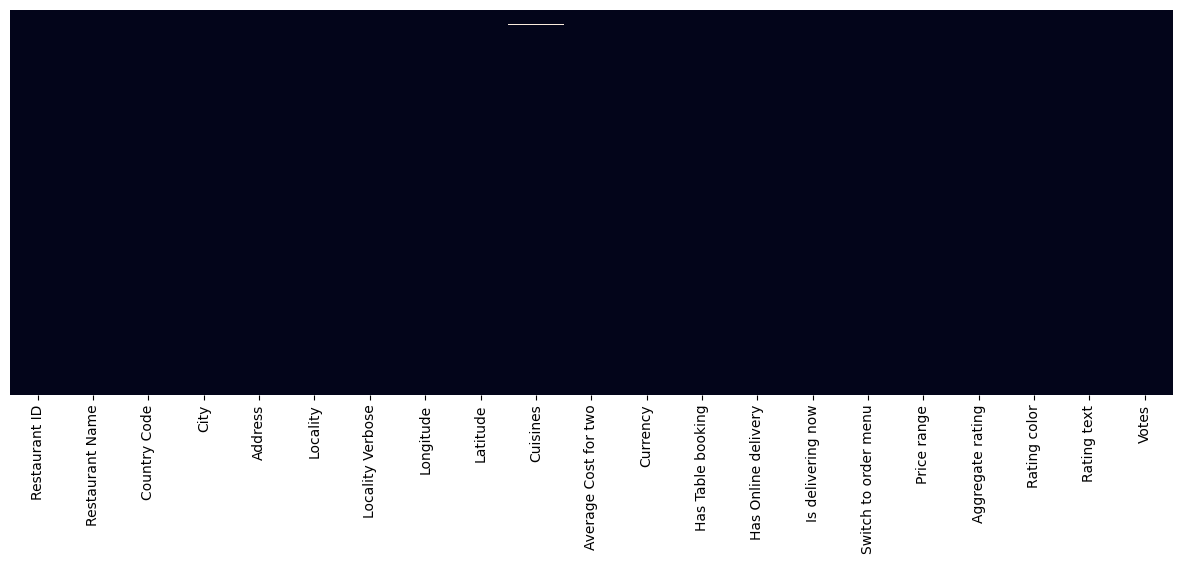

In [6]:
# The missing values are white line which can u seen in this heatmap graph.
plt.figure(figsize=(15,5));
sns.heatmap(df.isna(),yticklabels=False,cbar=False);          

# There is an another dataset which country code data. so let's read it.

In [7]:
df_country = pd.read_excel(r'C:\Users\Abhin\OneDrive\Desktop\IMP\eda and feature engineer\Country-Code.xlsx')
df_country.tail()

,Country Code,Country
10,191,Sri Lanka
11,208,Turkey
12,214,UAE
13,215,United Kingdom
14,216,United States


In [8]:
df_country.shape

(15, 2)

In [9]:
final_df = pd.merge(df,df_country,on="Country Code",how='left')
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


# How many Countries in  Country Columns and their frequency :- 

In [10]:
final_df.Country.value_counts()

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

# Show the top 3 countries in which zomato are sales mostly

In [11]:
country_name = final_df.Country.value_counts().index

In [12]:
country_values = final_df.Country.value_counts().values

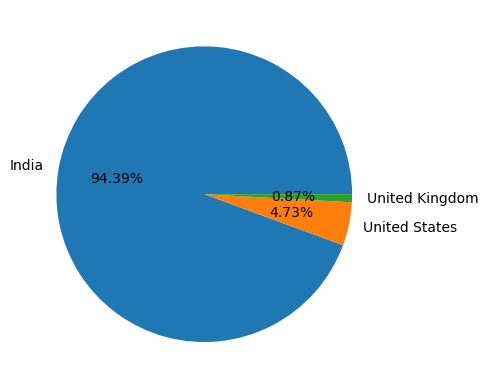

In [13]:
fig,ax = plt.subplots()
ax.pie(country_values[:3],labels=country_name[:3],autopct='%1.2f%%');

In [14]:
Rating = final_df.groupby(['Aggregate rating',	'Rating color',	'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
Rating.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


# Observation:- 
# the rating between 4.5 - 4.9 comes under excellent
# the rating between 4.0 - 4.4 comes under Very good
# the rating between 3.5 - 3.9 comes under good
# the rating between 2.5 - 3.4 comes under Average
# the rating between 1.8 - 2.4 comes under Poor
# the rating 0.0 comes under Not Rated

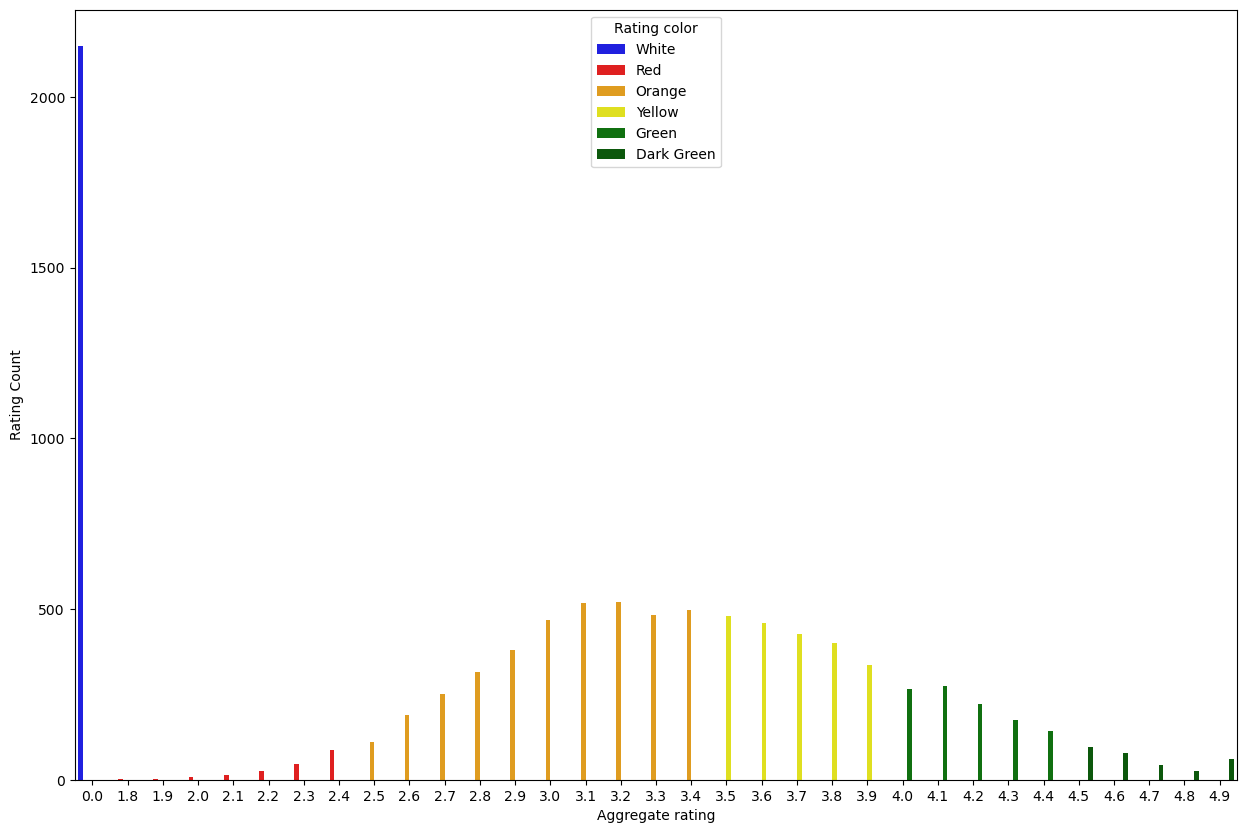

In [15]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Aggregate rating",y='Rating Count',data = Rating,hue='Rating color',palette=['Blue','Red','Orange','Yellow','Green', '#006400']);

# Find out the countries name that has given 0 rating

In [16]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [17]:
final_df.rename(columns={'Aggregate rating': 'Aggregate_Rating'}, inplace=True)
final_df.query('Aggregate_Rating == 0.0').loc[:,['Country']].groupby('Country').size().reset_index().rename(columns={0:'Count'}).sort_values(by='Count',ascending=False)

,Country,Count
1,India,2139
0,Brazil,5
3,United States,3
2,United Kingdom,1


# Find out the which country is used which currency

In [18]:
# currency = final_df.drop_duplicates(subset='Country',keep = 'last',ignore_index=True).loc[:,['Country','Currency']]
# currency
currency = final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index().rename(columns={0:'Count'})
currency

,Country,Currency,Count
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


# which countries do have online deliveries

In [19]:
final_df[final_df['Has Online delivery']=='Yes'][['Country','Has Online delivery']].groupby('Country').size().reset_index().rename(columns={0:'Has_online_delivery_count'})

,Country,Has_online_delivery_count
0,India,2423
1,UAE,28


In [20]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

# Create a pie chart for cities distribution in India

In [21]:
city_distribution = final_df[final_df['Country']=='India'][['City']].groupby('City').size().reset_index().rename(columns={0:'Count'}).sort_values(by='Count',ascending=False)
city_distribution.head()

,City,Count
31,New Delhi,5473
15,Gurgaon,1118
32,Noida,1080
12,Faridabad,251
13,Ghaziabad,25


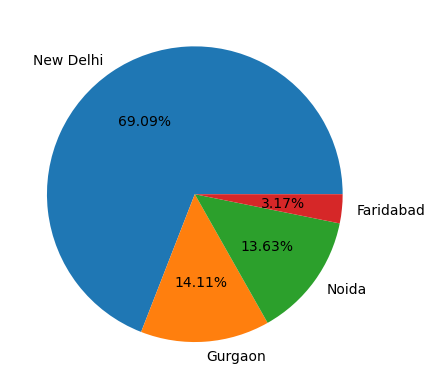

In [22]:
fig,ax=plt.subplots()
ax.pie(x=city_distribution['Count'].iloc[:4],autopct='%1.2f%%',labels=city_distribution['City'].iloc[:4]);

In [23]:
# Find top 10 Cuisines(Food Items)

In [24]:
top_10_Cuisines = df[['Cuisines']].value_counts().sort_values(ascending=False).iloc[:10]
top_10_Cuisines

Cuisines                      
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

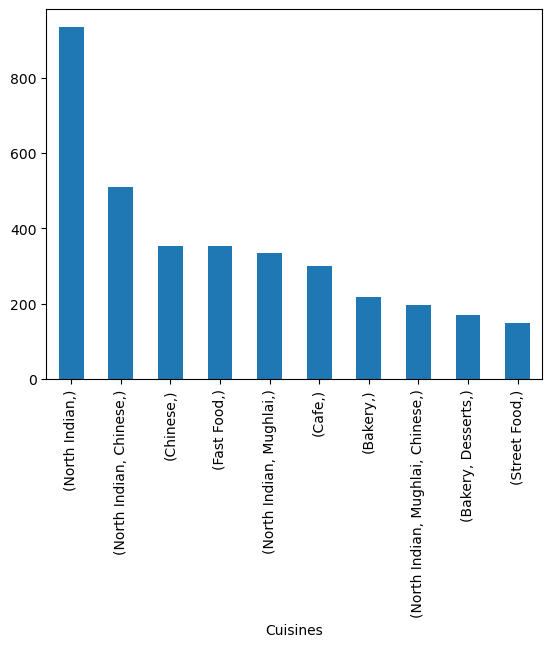

In [25]:
fig,ax=plt.subplots()
top_10_Cuisines.plot.bar(x=top_10_Cuisines.index.get_level_values(0) ,y=top_10_Cuisines.values);

In [31]:
# Which Res

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
